In [28]:
import pandas as pd 
import numpy as np 
import sklearn.model_selection as model_selection 
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import matplotlib as plt

In [29]:
# read the data to a dataframe
df = pd.read_csv("/kaggle/input/adult-census-income/adult.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [31]:
# create the target variable y using a lambda function
# if income>50K, theny=1
# if income<=50K, then y=0
low_inc = df['income'][0]
y = df['income'].apply(lambda x:0 if x==low_inc else 1) 
X = df.drop(['income'],axis=1)
X.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?


In [32]:
#one-hot encode
X = pd.get_dummies(X) 
X.head(10)

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,90,77053,9,0,4356,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,82,132870,9,0,4356,18,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,66,186061,10,0,4356,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,54,140359,4,0,3900,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,41,264663,10,0,3900,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,34,216864,9,0,3770,45,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,38,150601,6,0,3770,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,74,88638,16,0,3683,20,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,68,422013,9,0,3683,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
9,41,70037,10,0,3004,60,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
from  sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Logistic regression

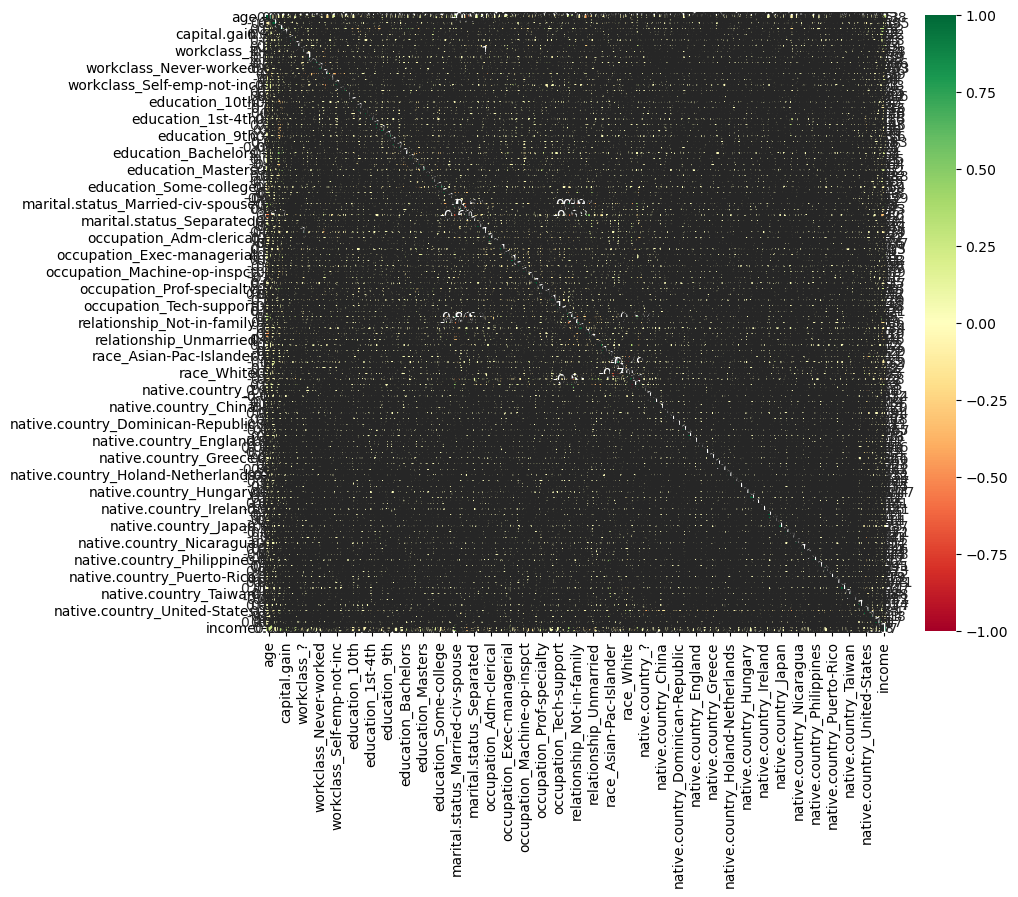

In [17]:
# Visualize the correlation between features and target using a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(pd.concat([X,y],axis=1).corr(),annot=True,cmap='RdYlGn')
plt.show()

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Perform 5-fold cross-validation on the training set
cv_scores = cross_val_score(log_reg, X_train, Y_train, cv=5)

# Fit the model on the training set
log_reg.fit(X_train, Y_train)

# Use the model to predict the test data
Y_pred = log_reg.predict(X_test)

# Evaluate the model using accuracy, confusion matrix, and classification report
accuracy = accuracy_score(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)

print("Cross-validated accuracy:", cv_scores.mean())
print("Test set accuracy:", accuracy)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)




Cross-validated accuracy: 0.7985257245230001
Test set accuracy: 0.7985567326884692
Confusion Matrix:
 [[4810  166]
 [1146  391]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.97      0.88      4976
           1       0.70      0.25      0.37      1537

    accuracy                           0.80      6513
   macro avg       0.75      0.61      0.63      6513
weighted avg       0.78      0.80      0.76      6513



## Decesion tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import seaborn as sns

In [41]:
# Importing required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Creating the decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Perform 5-fold cross validation
scores = cross_val_score(dt_classifier, X, y, cv=5)

# Print the accuracy for each fold and the mean accuracy
print("Accuracy for each fold: ", scores)
print("Mean Accuracy: ", scores.mean())


Accuracy for each fold:  [0.7434362  0.71867322 0.78086609 0.79176904 0.78716216]
Mean Accuracy:  0.7643813440969129


## Naive Bayes

In [23]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate

gnb = GaussianNB()
scores = cross_validate(gnb, X, y, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])
print("Accuracy:", scores['test_accuracy'].mean())
print("Precision:", scores['test_precision'].mean())
print("Recall:", scores['test_recall'].mean())
print("F1-score:", scores['test_f1'].mean())


Accuracy: 0.7768512775997807
Precision: 0.28694702348443474
Recall: 0.20529243246055592
F1-score: 0.2303389144070726


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
